In [1]:
#this chapter is all about ensemble learning methods and random forests.

#explore the concepts of bagging, boosting aand stacking

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard'
)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [3]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [5]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train),
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.904


In [6]:
#try editing the svm classifier to allow it to output probabilities
#this allows us to remake our ensemble model with the voting set to 'soft', 
#allowing it to take probabilities from each model into account

svm_clf = SVC(probability=True)

In [7]:
#remake the model with the new svm_clf

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train),
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.88
SVC 0.896
VotingClassifier 0.912


In [15]:
#improved accuracy by 0.8%

#Now for bagging and paasting
#bgging is when a training algorithm is used on different random subsets of the data WITH replacement
#pasting => without replacement

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)

bag_clf.fit(X_train,y_train)

y_pred = bag_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.912

In [19]:
import matplotlib.pyplot as plt

def plot_decision_boundary_new(clf, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap='RdGy')
    
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

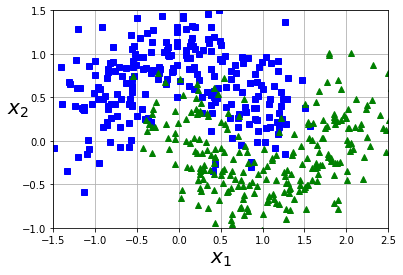

In [21]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", alpha=1)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", alpha=1)
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

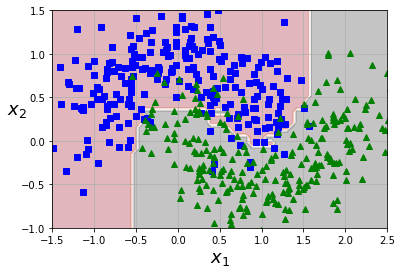

In [23]:
import numpy as np

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plot_decision_boundary_new(bag_clf, X, y, [-3,3,-3,3])

In [24]:
#pretty good accuracy @ 91.2%
#bagging generally produces better models, however it does have a slightly hisgher bias than pasting

#we cn evaluate bagging predictors using the point which they have not used to trin themseleves.
#this is called out of bag evaluation

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True)

bag_clf.fit(X_train,y_train)

bag_clf.oob_score_

0.9013333333333333

In [25]:
#this means we are likely to receive about 90.1% accuracy on the test set. Test it
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.904

In [30]:
#instead of bagging with a decision tree, the random forest classifier is optimized for this task.

from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)

In [31]:
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)

In [33]:
accuracy_score(y_test, y_pred)

0.912

In [34]:
#Extra-trees introduces an element of randomness to the feature thresholds
#This makes the model training faster. Typically the trade off is more bias for lower variance

from sklearn.ensemble import ExtraTreesClassifier

ext_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
ext_clf.fit(X_train, y_train)
y_pred = ext_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

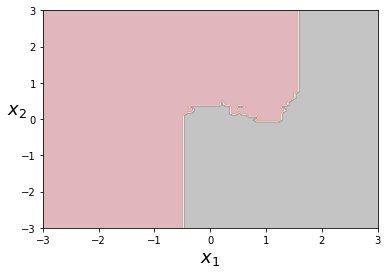

In [35]:
plot_decision_boundary_new(rnd_clf, X, y, [-3,3,-3,3])

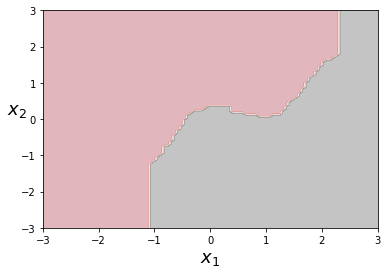

In [36]:
plot_decision_boundary_new(ext_clf, X, y, [-3,3,-3,3])

In [38]:
#Random forests allow us to see the importance of each feature
#Demonstrate on the iris data set

from sklearn.datasets import load_iris

iris = load_iris()

rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris['data'], iris['target'])

for name, score in zip(iris['feature_names'], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.09963051356118943
sepal width (cm) 0.022293551223272597
petal length (cm) 0.44336509518718525
petal width (cm) 0.4347108400283528


In [39]:
#Raandom forests very useufl to get aa quick idea of what features are important

#Boosting is a technique that involves combinging  series of weak learners into a strong learner
#Two popular methods are adaptive boosting and gradient boosting

from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm='SAMME.R', learning_rate=0.5)

ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [42]:
#A gradient boosting mechanism works similaarly to the string of model trainings below

from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X,y)

DecisionTreeRegressor(max_depth=2)

In [43]:
y2 = y-tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X,y2)

DecisionTreeRegressor(max_depth=2)

In [44]:
#etc..

from sklearn.ensemble import GradientBoostingRegressor

grbt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1)
grbt.fit(X,y)

GradientBoostingRegressor(learning_rate=1, max_depth=2, n_estimators=3)

In [48]:
#erly stopping can be used gain to find the optimal number of estimtors/learning rate

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X,y)

grbt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
grbt.fit(X_train,y_train)

errors = [mean_squared_error(y_val, y_pred)
         for y_pred in grbt.staged_predict(X_val)]
best_n_estimators = np.argmin(errors) + 1

In [49]:
gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=best_n_estimators)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=62)

Text(0.5, 1.0, 'Validation error')

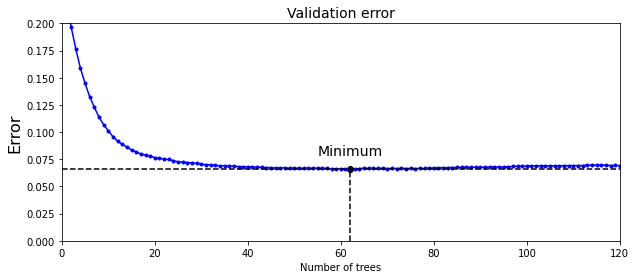

In [56]:
min_error = np.min(errors)

plt.figure(figsize=(10, 4))

plt.plot(np.arange(1, len(errors) + 1), errors, "b.-")
plt.plot([best_n_estimators, best_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(best_n_estimators, min_error, "ko")
plt.text(best_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.2])
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)

In [58]:
#We can implement early stopping through another method
#This will stop the training once the validation error does not improve for 5 consecutive iterations:

min_val_error = float('inf')

error_going_up = 0

for n_estimators in range(1,120):
    grbt.n_estimators = n_estimators
    grbt.fit(X_train, y_train)
    y_pred = grbt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break

In [59]:
n_estimators

67

In [63]:
#makes sense that it is 5 more than what we found in the previous method.

#XGBoost is a popular python library which works quite similrly to scikit learn.
#it also takes care of early stopping itself

import xgboost

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_val)

In [64]:
#with early stopping

xgb_reg.fit(X_train, y_train,
           eval_set=[(X_val, y_val)], early_stopping_rounds=2)
y_pred = xgb_reg.predict(X_val)

[0]	validation_0-rmse:0.39827
[1]	validation_0-rmse:0.33123
[2]	validation_0-rmse:0.30219
[3]	validation_0-rmse:0.28329
[4]	validation_0-rmse:0.27470
[5]	validation_0-rmse:0.27000
[6]	validation_0-rmse:0.27172
[7]	validation_0-rmse:0.27415


C:\Users\Rudy Schneeweiss\miniconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
